<a href="https://colab.research.google.com/github/laoktaviana/SistemCerdas/blob/main/SisCerdas_tanh%26arctan_2101201026_Laily_Ade_O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Laily Ade (2101201026)

**Train Tensor Flow Menggunakan Library Keras**



Terdiri dari 4 skenario dengan 2 fungsi (tanh & arctan) setiap model untuk dianalisis. 

Skenario 1:
- tanh: 1 input dengan 8 neurons, 1 output
- arctan: 1 input dengan 8 neurons, 1 output

Skenario 2:
- tanh: 1 input dengan 16 neurons, 1 output
- arctan: 1 input dengan 16 neurons, 1 outpu

Skenario 3: 
- tanh: 1 input dengan 8 neurons, 1 hidden layers dengan 8 neurons, 1 output
- arctan: 1 input dengan 8 neurons, 1 hidden layers dengan 8 neurons, 1 output

Skenario 4:
- tanh: 1 input 16 neuron, 1 hidden layer dengan 16 neuron, 1 output
- arctan: 1 input 16 neuron, 1 hidden layer dengan 16 neuron, 1 output

In [ ]:
# Define paths to model files
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

MODEL_TF_1 = MODELS_DIR + 'model_1'
MODEL_TF_2 = MODELS_DIR + 'model_2'
MODEL_TF_3 = MODELS_DIR + 'model_3'
MODEL_TF_4 = MODELS_DIR + 'model_4'
MODEL_TF_5 = MODELS_DIR + 'model_5'
MODEL_TF_6 = MODELS_DIR + 'model_6'
MODEL_TF_7 = MODELS_DIR + 'model_7'
MODEL_TF_8 = MODELS_DIR + 'model_8'

! pip install tensorflow==2.4.0rc0

import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math

# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

**Data Set**

1. Generate Data:
random x value, akan dihitung nilai tanh & arctan, dan ditampilkan dalam graph.

Generate 1000 data sampel untuk 4 skenario (tanh & arctan).

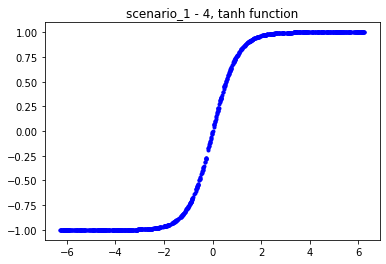

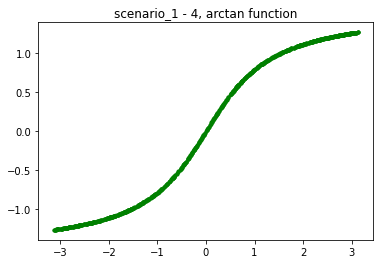

In [ ]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# -2π to 2π, which covers a complete tanh wave oscillation
# -2(π/2) to 2(π/2), which covers a complete arctan wave oscillation

# scenario 1
x_1_values = np.random.uniform(
    low=-2*math.pi, high=2*math.pi, size=SAMPLES).astype(np.float32)
x_2_values = np.random.uniform(
    low=-2*(math.pi/2), high=2*(math.pi/2), size=SAMPLES).astype(np.float32)

# scenario 2
x_3_values = np.random.uniform(
    low=-2*math.pi, high=2*math.pi, size=SAMPLES).astype(np.float32)
x_4_values = np.random.uniform(
    low=-2*(math.pi/2), high=2*(math.pi/2), size=SAMPLES).astype(np.float32)

# scenario 3
x_5_values = np.random.uniform(
    low=-2*math.pi, high=2*math.pi, size=SAMPLES).astype(np.float32)
x_6_values = np.random.uniform(
    low=-2*(math.pi/2), high=2*(math.pi/2), size=SAMPLES).astype(np.float32)

# scenario 4
x_7_values = np.random.uniform(
    low=-2*math.pi, high=2*math.pi, size=SAMPLES).astype(np.float32)
x_8_values = np.random.uniform(
    low=-2*(math.pi/2), high=2*(math.pi/2), size=SAMPLES).astype(np.float32)

# Shuffle the values for tanh and arctan to guarantee they're not in order

# scenario 1
np.random.shuffle(x_1_values)
np.random.shuffle(x_2_values)

# scenario 2
np.random.shuffle(x_3_values)
np.random.shuffle(x_4_values)

# scenario 3
np.random.shuffle(x_5_values)
np.random.shuffle(x_6_values)

# scenario 4
np.random.shuffle(x_7_values)
np.random.shuffle(x_8_values)

# Calculate the corresponding tanh values
# Calculate the corresponding arctan values

# scenario 1
y_1_values = np.tanh(x_1_values).astype(np.float32)
y_2_values = np.arctan(x_2_values).astype(np.float32)

# scenario 2
y_3_values = np.tanh(x_3_values).astype(np.float32)
y_4_values = np.arctan(x_4_values).astype(np.float32)

# scenario 3
y_5_values = np.tanh(x_5_values).astype(np.float32)
y_6_values = np.arctan(x_6_values).astype(np.float32)

# scenario 4
y_7_values = np.tanh(x_7_values).astype(np.float32)
y_8_values = np.arctan(x_8_values).astype(np.float32)

# Plot our data. The 'b.' argument tells the library to print blue dots.
# Plot our data. The 'g.' argument tells the library to print green dots.

# scenario 1 - 4
plt.title('scenario_1 - 4, tanh function')
plt.plot(x_1_values, y_1_values, 'b.')
plt.show()

plt.title('scenario_1 - 4, arctan function')
plt.plot(x_2_values, y_2_values, 'g.')
plt.show()

2. Add Noise
Guna penambahan noise sebagai data untuk pengujian model.

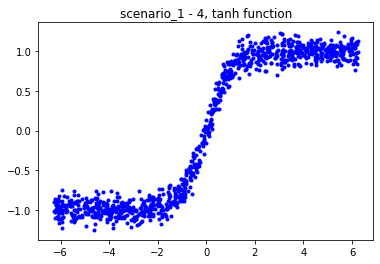

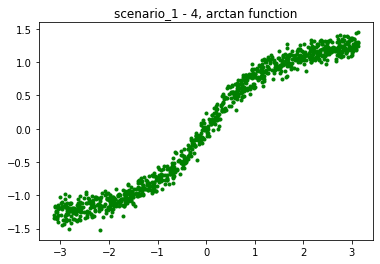

In [ ]:
# Add a small random number to each y value

# scenario 1
y_1_values += 0.1 * np.random.randn(*y_1_values.shape)
y_2_values += 0.1 * np.random.randn(*y_2_values.shape)

# scenario 2
y_3_values += 0.1 * np.random.randn(*y_3_values.shape)
y_4_values += 0.1 * np.random.randn(*y_4_values.shape)

# scenario 3
y_5_values += 0.1 * np.random.randn(*y_5_values.shape)
y_6_values += 0.1 * np.random.randn(*y_6_values.shape)

# scenario 4
y_7_values += 0.1 * np.random.randn(*y_7_values.shape)
y_8_values += 0.1 * np.random.randn(*y_8_values.shape)

# Plot our data

# scenario 1 - 4
plt.title('scenario_1 - 4, tanh function')
plt.plot(x_1_values, y_1_values, 'b.')
plt.show()

plt.title('scenario_1 - 4, arctan function')
plt.plot(x_2_values, y_2_values, 'g.')
plt.show()

3. Split the Data
Data set noise mendekati data dunia nyata. Digunakan untuk melatih model. 

Keakuratan model dengan membandingkan prediksi dengan data nyata. 

Pembagian data sebagai berikut
Pelatihan: 60%
Validasi: 20%
Pengujian: 20%

Pada tahap ini data akan dibagi kemudian memplot setiap set sebagai warna yang berbeda. 

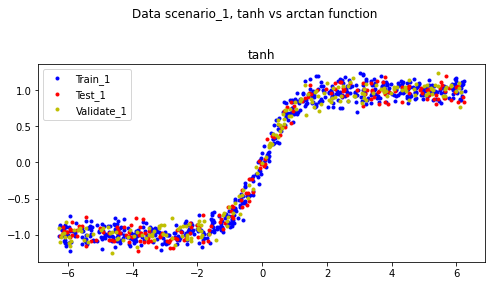

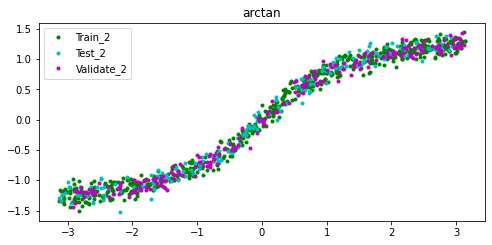

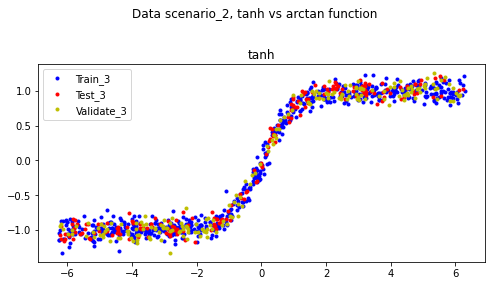

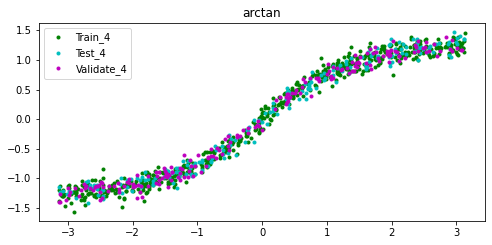

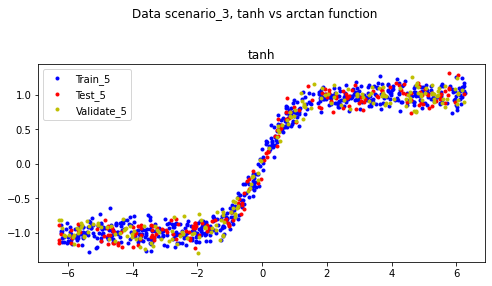

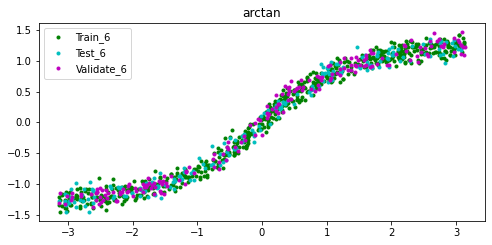

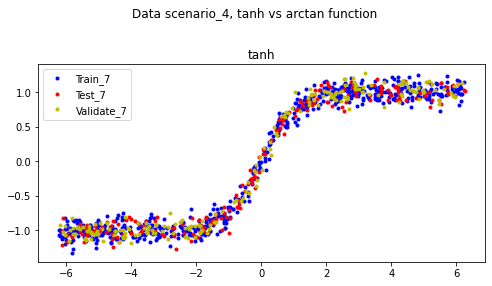

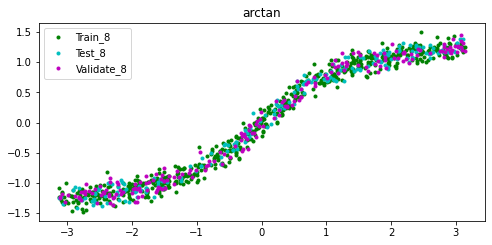

In [ ]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.

# scenario 1
TRAIN_1_SPLIT =  int(0.6 * SAMPLES)
TEST_1_SPLIT = int(0.2 * SAMPLES + TRAIN_1_SPLIT)

TRAIN_2_SPLIT =  int(0.6 * SAMPLES)
TEST_2_SPLIT = int(0.2 * SAMPLES + TRAIN_2_SPLIT)

# scenario 2
TRAIN_3_SPLIT =  int(0.6 * SAMPLES)
TEST_3_SPLIT = int(0.2 * SAMPLES + TRAIN_3_SPLIT)

TRAIN_4_SPLIT =  int(0.6 * SAMPLES)
TEST_4_SPLIT = int(0.2 * SAMPLES + TRAIN_4_SPLIT)

# scenario 3
TRAIN_5_SPLIT =  int(0.6 * SAMPLES)
TEST_5_SPLIT = int(0.2 * SAMPLES + TRAIN_5_SPLIT)

TRAIN_6_SPLIT =  int(0.6 * SAMPLES)
TEST_6_SPLIT = int(0.2 * SAMPLES + TRAIN_6_SPLIT)

# scenario 4
TRAIN_7_SPLIT =  int(0.6 * SAMPLES)
TEST_7_SPLIT = int(0.2 * SAMPLES + TRAIN_7_SPLIT)

TRAIN_8_SPLIT =  int(0.6 * SAMPLES)
TEST_8_SPLIT = int(0.2 * SAMPLES + TRAIN_8_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.

# scenario 1
x_1_train, x_1_test, x_1_validate = np.split(x_1_values, [TRAIN_1_SPLIT, TEST_1_SPLIT])
y_1_train, y_1_test, y_1_validate = np.split(y_1_values, [TRAIN_1_SPLIT, TEST_1_SPLIT])

x_2_train, x_2_test, x_2_validate = np.split(x_2_values, [TRAIN_2_SPLIT, TEST_2_SPLIT])
y_2_train, y_2_test, y_2_validate = np.split(y_2_values, [TRAIN_2_SPLIT, TEST_2_SPLIT])

# scenario 2
x_3_train, x_3_test, x_3_validate = np.split(x_3_values, [TRAIN_3_SPLIT, TEST_3_SPLIT])
y_3_train, y_3_test, y_3_validate = np.split(y_3_values, [TRAIN_3_SPLIT, TEST_3_SPLIT])

x_4_train, x_4_test, x_4_validate = np.split(x_4_values, [TRAIN_4_SPLIT, TEST_4_SPLIT])
y_4_train, y_4_test, y_4_validate = np.split(y_4_values, [TRAIN_4_SPLIT, TEST_4_SPLIT])

# scenario 3
x_5_train, x_5_test, x_5_validate = np.split(x_5_values, [TRAIN_5_SPLIT, TEST_5_SPLIT])
y_5_train, y_5_test, y_5_validate = np.split(y_5_values, [TRAIN_5_SPLIT, TEST_5_SPLIT])

x_6_train, x_6_test, x_6_validate = np.split(x_6_values, [TRAIN_6_SPLIT, TEST_6_SPLIT])
y_6_train, y_6_test, y_6_validate = np.split(y_6_values, [TRAIN_6_SPLIT, TEST_6_SPLIT])

# scenario 4
x_7_train, x_7_test, x_7_validate = np.split(x_7_values, [TRAIN_7_SPLIT, TEST_7_SPLIT])
y_7_train, y_7_test, y_7_validate = np.split(y_7_values, [TRAIN_7_SPLIT, TEST_7_SPLIT])

x_8_train, x_8_test, x_8_validate = np.split(x_8_values, [TRAIN_8_SPLIT, TEST_8_SPLIT])
y_8_train, y_8_test, y_8_validate = np.split(y_8_values, [TRAIN_8_SPLIT, TEST_8_SPLIT])

# Double check that our splits add up correctly

# scenario 1
assert (x_1_train.size + x_1_validate.size + x_1_test.size) ==  SAMPLES
assert (x_2_train.size + x_2_validate.size + x_2_test.size) ==  SAMPLES

# scenario 2
assert (x_3_train.size + x_3_validate.size + x_3_test.size) ==  SAMPLES
assert (x_4_train.size + x_4_validate.size + x_4_test.size) ==  SAMPLES

# scenario 3
assert (x_5_train.size + x_5_validate.size + x_5_test.size) ==  SAMPLES
assert (x_6_train.size + x_6_validate.size + x_6_test.size) ==  SAMPLES

# scenario 4
assert (x_7_train.size + x_7_validate.size + x_7_test.size) ==  SAMPLES
assert (x_8_train.size + x_8_validate.size + x_8_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:

# scenario 1
plt.figure(figsize=(8, 8))
plt.suptitle('Data scenario_1, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_1_train, y_1_train, 'b.', label="Train_1")
plt.plot(x_1_test, y_1_test, 'r.', label="Test_1")
plt.plot(x_1_validate, y_1_validate, 'y.',label="Validate_1")
plt.title('tanh')
plt.legend()
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_2_train, y_2_train, 'g.', label="Train_2")
plt.plot(x_2_test, y_2_test, 'c.', label="Test_2")
plt.plot(x_2_validate, y_2_validate, 'm.', label="Validate_2")
plt.title('arctan')
plt.legend()
plt.show()

# scenario 2
plt.figure(figsize=(8, 8))
plt.suptitle('Data scenario_2, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_3_train, y_3_train, 'b.', label="Train_3")
plt.plot(x_3_test, y_3_test, 'r.', label="Test_3")
plt.plot(x_3_validate, y_3_validate, 'y.',label="Validate_3")
plt.title('tanh')
plt.legend()
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_4_train, y_4_train, 'g.', label="Train_4")
plt.plot(x_4_test, y_4_test, 'c.', label="Test_4")
plt.plot(x_4_validate, y_4_validate, 'm.', label="Validate_4")
plt.title('arctan')
plt.legend()
plt.show()

# scenario 3
plt.figure(figsize=(8, 8))
plt.suptitle('Data scenario_3, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_5_train, y_5_train, 'b.', label="Train_5")
plt.plot(x_5_test, y_5_test, 'r.', label="Test_5")
plt.plot(x_5_validate, y_5_validate, 'y.',label="Validate_5")
plt.title('tanh')
plt.legend()
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_6_train, y_6_train, 'g.', label="Train_6")
plt.plot(x_6_test, y_6_test, 'c.', label="Test_6")
plt.plot(x_6_validate, y_6_validate, 'm.', label="Validate_6")
plt.title('arctan')
plt.legend()
plt.show()

# scenario 4
plt.figure(figsize=(8, 8))
plt.suptitle('Data scenario_4, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_7_train, y_7_train, 'b.', label="Train_7")
plt.plot(x_7_test, y_7_test, 'r.', label="Test_7")
plt.plot(x_7_validate, y_7_validate, 'y.',label="Validate_7")
plt.title('tanh')
plt.legend()
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_8_train, y_8_train, 'g.', label="Train_8")
plt.plot(x_8_test, y_8_test, 'c.', label="Test_8")
plt.plot(x_8_validate, y_8_validate, 'm.', label="Validate_8")
plt.title('arctan')
plt.legend()
plt.show()

**Training**

1. Design the Model

In [ ]:
# We'll use Keras to create a simple model architecture for both model
# for 4 scenarios model

# A Sequential model is appropriate for a plain stack of layers 
# where each layer has exactly one input tensor and one output tensor.

# scenario 1
model_1 = tf.keras.Sequential()
model_2 = tf.keras.Sequential()

# scenario 2
model_3 = tf.keras.Sequential()
model_4 = tf.keras.Sequential()

# scenario 3
model_5 = tf.keras.Sequential()
model_6 = tf.keras.Sequential()

# scenario 4
model_7 = tf.keras.Sequential()
model_8 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 8 "neurons". The
# neurons decide whether to activate based on the 'tanh' activation function.

# Input layer

# scenario 1
model_1.add(keras.layers.Dense(8, activation='tanh', input_shape=(1,)))
model_2.add(keras.layers.Dense(8, activation='tanh', input_shape=(1,)))

# scenario 2
model_3.add(keras.layers.Dense(16, activation='tanh', input_shape=(1,)))
model_4.add(keras.layers.Dense(16, activation='tanh', input_shape=(1,)))

# scenario 3
model_5.add(keras.layers.Dense(8, activation='tanh', input_shape=(1,)))
model_6.add(keras.layers.Dense(8, activation='tanh', input_shape=(1,)))

# scenario 4
model_7.add(keras.layers.Dense(16, activation='tanh', input_shape=(1,)))
model_8.add(keras.layers.Dense(16, activation='tanh', input_shape=(1,)))

# The new second and third layer will help the network learn more complex representations

# 1st hidden layer

# scenario 3
model_5.add(keras.layers.Dense(8, activation='tanh'))
model_6.add(keras.layers.Dense(8, activation='tanh'))

# scenario 4
model_7.add(keras.layers.Dense(16, activation='tanh'))
model_8.add(keras.layers.Dense(16, activation='tanh'))

# Final layer is a single neuron, since we want to output a single value

# output layer

# scenario 1
model_1.add(keras.layers.Dense(1))
model_2.add(keras.layers.Dense(1))

# scenario 2
model_3.add(keras.layers.Dense(1))
model_4.add(keras.layers.Dense(1))

# scenario 3
model_5.add(keras.layers.Dense(1))
model_6.add(keras.layers.Dense(1))

# scenario 4
model_7.add(keras.layers.Dense(1))
model_8.add(keras.layers.Dense(1))

# Compile the model using the standard 'adamax' optimizer and the mean squared error or 'mse' loss function for regression.

# scenario 1
model_1.compile(optimizer='adamax', loss='mse', metrics=['mae'])
model_2.compile(optimizer='adamax', loss='mse', metrics=['mae'])

# scenario 2
model_3.compile(optimizer='adamax', loss='mse', metrics=['mae'])
model_4.compile(optimizer='adamax', loss='mse', metrics=['mae'])

# scenario 3
model_5.compile(optimizer='adamax', loss='mse', metrics=['mae'])
model_6.compile(optimizer='adamax', loss='mse', metrics=['mae'])

# scenario 4
model_7.compile(optimizer='adamax', loss='mse', metrics=['mae'])
model_8.compile(optimizer='adamax', loss='mse', metrics=['mae'])

2. Train the Model

In [ ]:
# Train both model on our training data while validating on our validation set

# scenario 1
history_1 = model_1.fit(x_1_train, y_1_train, epochs=500, batch_size=64,
                        validation_data=(x_1_validate, y_1_validate))
history_2 = model_2.fit(x_2_train, y_2_train, epochs=500, batch_size=64,
                        validation_data=(x_2_validate, y_2_validate))

# scenario 2
history_3 = model_3.fit(x_1_train, y_1_train, epochs=500, batch_size=64,
                        validation_data=(x_1_validate, y_1_validate))
history_4 = model_4.fit(x_2_train, y_2_train, epochs=500, batch_size=64,
                        validation_data=(x_2_validate, y_2_validate))

# scenario 3
history_5 = model_5.fit(x_1_train, y_1_train, epochs=500, batch_size=64,
                        validation_data=(x_1_validate, y_1_validate))
history_6 = model_6.fit(x_2_train, y_2_train, epochs=500, batch_size=64,
                        validation_data=(x_2_validate, y_2_validate))

# scenario 4
history_7 = model_7.fit(x_1_train, y_1_train, epochs=500, batch_size=64,
                        validation_data=(x_1_validate, y_1_validate))
history_8 = model_8.fit(x_2_train, y_2_train, epochs=500, batch_size=64,
                        validation_data=(x_2_validate, y_2_validate))

# Save the model to disk
model_1.save(MODEL_TF_1)
model_2.save(MODEL_TF_2)
model_3.save(MODEL_TF_3)
model_4.save(MODEL_TF_4)
model_5.save(MODEL_TF_5)
model_6.save(MODEL_TF_6)
model_7.save(MODEL_TF_7)
model_8.save(MODEL_TF_8)

Streaming output truncated to the last 5000 lines.
Epoch 1/500
10/10 [==============================] - 1s 22ms/step - loss: 0.1574 - mae: 0.3711 - val_loss: 0.0968 - val_mae: 0.2904
Epoch 2/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0821 - mae: 0.2605 - val_loss: 0.0520 - val_mae: 0.2015
Epoch 3/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0443 - mae: 0.1807 - val_loss: 0.0310 - val_mae: 0.1448
Epoch 4/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0272 - mae: 0.1371 - val_loss: 0.0225 - val_mae: 0.1206
Epoch 5/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0202 - mae: 0.1185 - val_loss: 0.0194 - val_mae: 0.1122
Epoch 6/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0181 - mae: 0.1106 - val_loss: 0.0182 - val_mae: 0.1095
Epoch 7/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0176 - mae: 0.1059 - val_loss: 0.0179 - val_mae: 0.1090
Epoch 8/500
10/10 [============

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: models/model_1/assets

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: models/model_2/assets

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: models/model_3/assets

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be

3. Plot Metrics

3.1. Loss (or Mean Squared Error)

<Figure size 432x288 with 0 Axes>

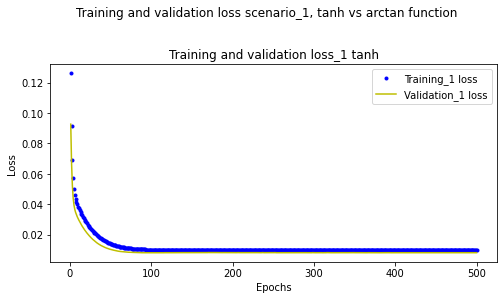

<Figure size 432x288 with 0 Axes>

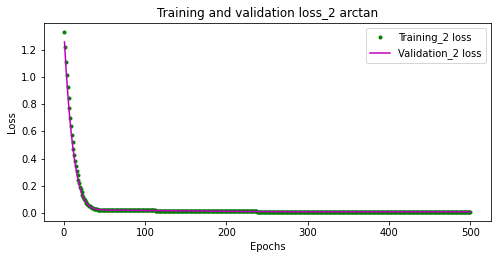

<Figure size 432x288 with 0 Axes>

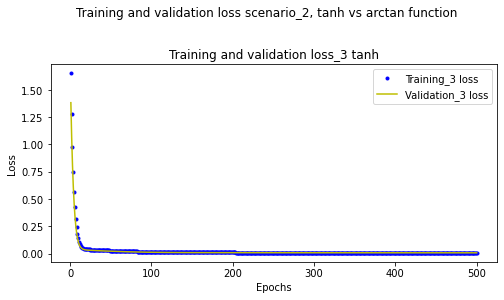

<Figure size 432x288 with 0 Axes>

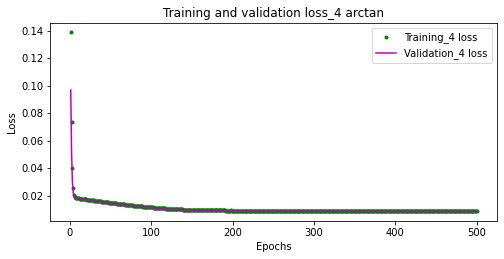

<Figure size 432x288 with 0 Axes>

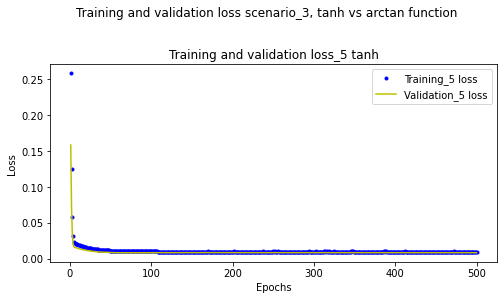

<Figure size 432x288 with 0 Axes>

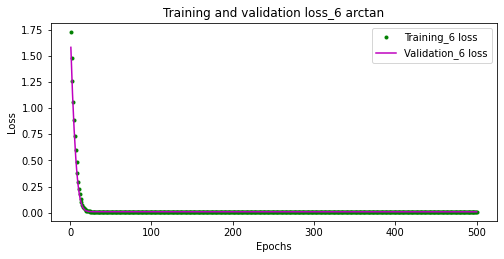

<Figure size 432x288 with 0 Axes>

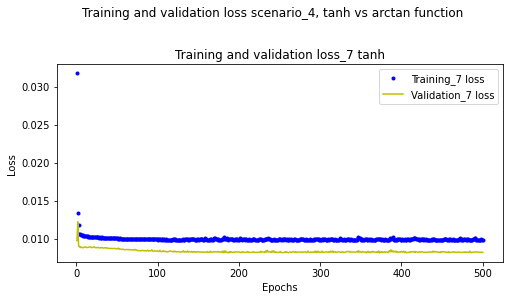

<Figure size 432x288 with 0 Axes>

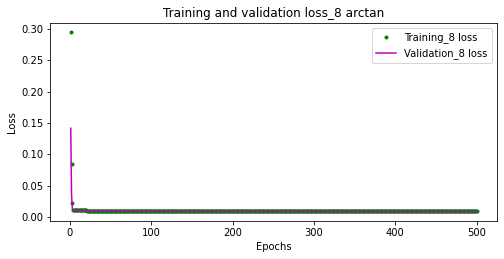

In [ ]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
# Create training and validation object to store loss and val_loss 
# from both model (sinh & arctan)

# scenario 1
train_1_loss = history_1.history['loss']
val_1_loss = history_1.history['val_loss']

train_2_loss = history_2.history['loss']
val_2_loss = history_2.history['val_loss']

# scenario 2
train_3_loss = history_3.history['loss']
val_3_loss = history_3.history['val_loss']

train_4_loss = history_4.history['loss']
val_4_loss = history_4.history['val_loss']

# scenario 3
train_5_loss = history_5.history['loss']
val_5_loss = history_5.history['val_loss']

train_6_loss = history_6.history['loss']
val_6_loss = history_6.history['val_loss']

# scenario 4
train_7_loss = history_7.history['loss']
val_7_loss = history_7.history['val_loss']

train_8_loss = history_8.history['loss']
val_8_loss = history_8.history['val_loss']

# set how many iteration to train or validate the model

# scenario 1
epochs_1 = range(1, len(train_1_loss) + 1)
epochs_2 = range(1, len(train_2_loss) + 1)

# scenario 2
epochs_3 = range(1, len(train_3_loss) + 1)
epochs_4 = range(1, len(train_4_loss) + 1)

# scenario 3
epochs_5 = range(1, len(train_5_loss) + 1)
epochs_6 = range(1, len(train_6_loss) + 1)

# scenario 4
epochs_7 = range(1, len(train_7_loss) + 1)
epochs_8 = range(1, len(train_8_loss) + 1)

# Create graph of each model

# scenario 1
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_1, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_1, train_1_loss, 'b.', label='Training_1 loss')
plt.plot(epochs_1, val_1_loss, 'y', label='Validation_1 loss')
plt.title('Training and validation loss_1 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_2, train_2_loss, 'g.', label='Training_2 loss')
plt.plot(epochs_2, val_2_loss, 'm', label='Validation_2 loss')
plt.title('Training and validation loss_2 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# scenario 2
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_2, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_3, train_3_loss, 'b.', label='Training_3 loss')
plt.plot(epochs_3, val_3_loss, 'y', label='Validation_3 loss')
plt.title('Training and validation loss_3 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_4, train_4_loss, 'g.', label='Training_4 loss')
plt.plot(epochs_4, val_4_loss, 'm', label='Validation_4 loss')
plt.title('Training and validation loss_4 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# scenario 3
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_3, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_5, train_5_loss, 'b.', label='Training_5 loss')
plt.plot(epochs_5, val_5_loss, 'y', label='Validation_5 loss')
plt.title('Training and validation loss_5 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_6, train_6_loss, 'g.', label='Training_6 loss')
plt.plot(epochs_6, val_6_loss, 'm', label='Validation_6 loss')
plt.title('Training and validation loss_6 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# scenario 4
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_4, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_7, train_7_loss, 'b.', label='Training_7 loss')
plt.plot(epochs_7, val_7_loss, 'y', label='Validation_7 loss')
plt.title('Training and validation loss_7 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_8, train_8_loss, 'g.', label='Training_8 loss')
plt.plot(epochs_8, val_8_loss, 'm', label='Validation_8 loss')
plt.title('Training and validation loss_8 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

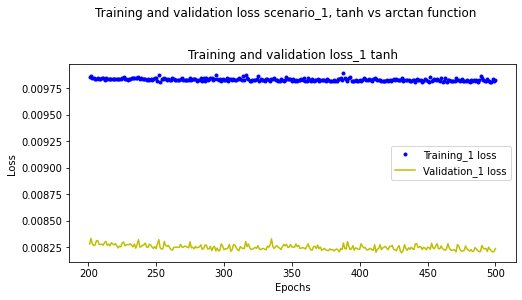

<Figure size 432x288 with 0 Axes>

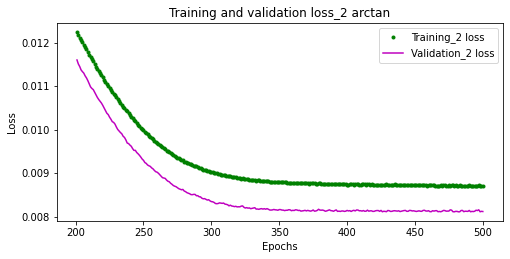

<Figure size 432x288 with 0 Axes>

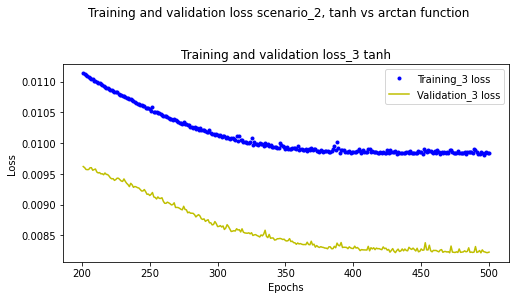

<Figure size 432x288 with 0 Axes>

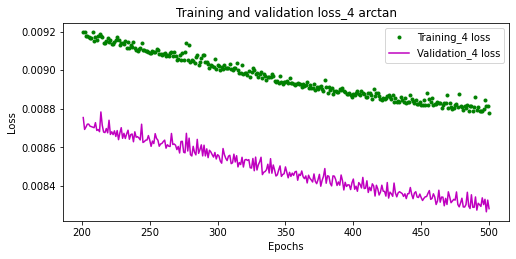

<Figure size 432x288 with 0 Axes>

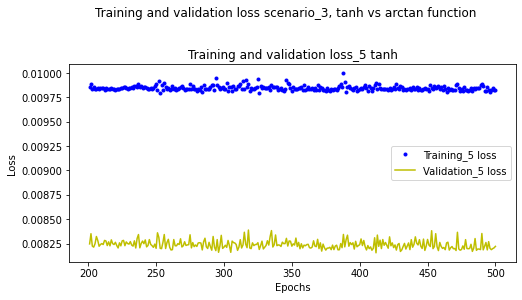

<Figure size 432x288 with 0 Axes>

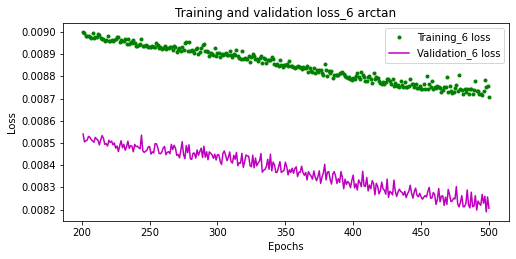

<Figure size 432x288 with 0 Axes>

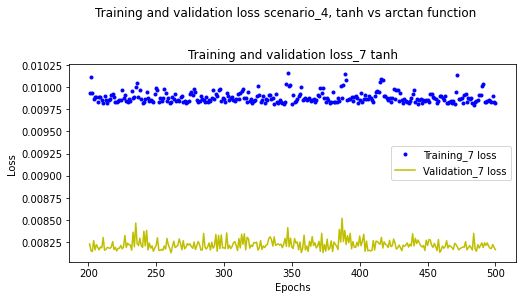

<Figure size 432x288 with 0 Axes>

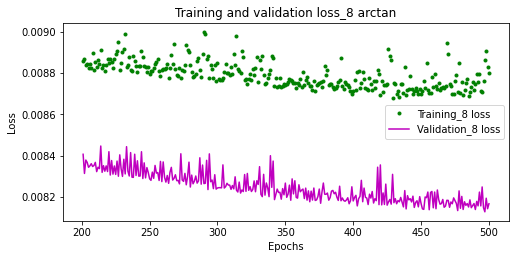

In [ ]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 200

# scenario 1
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_1, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_1[SKIP:], train_1_loss[SKIP:], 'b.', label='Training_1 loss')
plt.plot(epochs_1[SKIP:], val_1_loss[SKIP:], 'y', label='Validation_1 loss')
plt.title('Training and validation loss_1 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_2[SKIP:], train_2_loss[SKIP:], 'g.', label='Training_2 loss')
plt.plot(epochs_2[SKIP:], val_2_loss[SKIP:], 'm', label='Validation_2 loss')
plt.title('Training and validation loss_2 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# scenario 2
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_2, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_3[SKIP:], train_3_loss[SKIP:], 'b.', label='Training_3 loss')
plt.plot(epochs_3[SKIP:], val_3_loss[SKIP:], 'y', label='Validation_3 loss')
plt.title('Training and validation loss_3 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_4[SKIP:], train_4_loss[SKIP:], 'g.', label='Training_4 loss')
plt.plot(epochs_4[SKIP:], val_4_loss[SKIP:], 'm', label='Validation_4 loss')
plt.title('Training and validation loss_4 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# scenario 3
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_3, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_5[SKIP:], train_5_loss[SKIP:], 'b.', label='Training_5 loss')
plt.plot(epochs_5[SKIP:], val_5_loss[SKIP:], 'y', label='Validation_5 loss')
plt.title('Training and validation loss_5 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_6[SKIP:], train_6_loss[SKIP:], 'g.', label='Training_6 loss')
plt.plot(epochs_6[SKIP:], val_6_loss[SKIP:], 'm', label='Validation_6 loss')
plt.title('Training and validation loss_6 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# scenario 4
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation loss scenario_4, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_7[SKIP:], train_7_loss[SKIP:], 'b.', label='Training_7 loss')
plt.plot(epochs_7[SKIP:], val_7_loss[SKIP:], 'y', label='Validation_7 loss')
plt.title('Training and validation loss_7 tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_8[SKIP:], train_8_loss[SKIP:], 'g.', label='Training_8 loss')
plt.plot(epochs_8[SKIP:], val_8_loss[SKIP:], 'm', label='Validation_8 loss')
plt.title('Training and validation loss_8 arctan')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2. Mean Absolute Error

<Figure size 432x288 with 0 Axes>

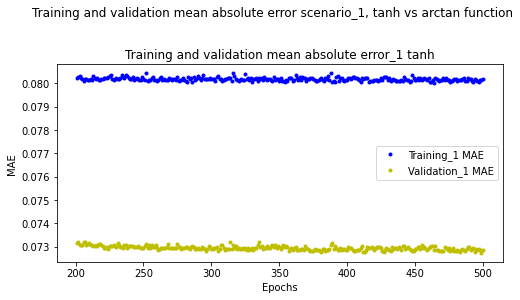

<Figure size 432x288 with 0 Axes>

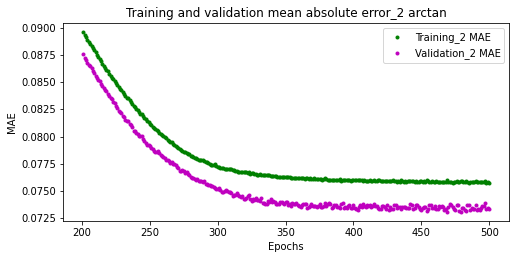

<Figure size 432x288 with 0 Axes>

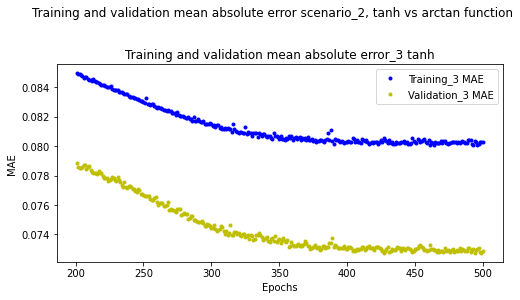

<Figure size 432x288 with 0 Axes>

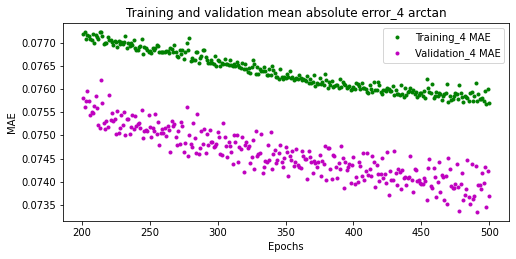

<Figure size 432x288 with 0 Axes>

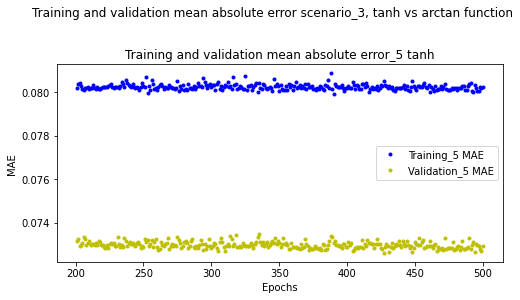

<Figure size 432x288 with 0 Axes>

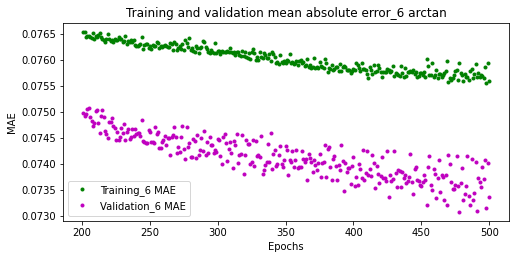

<Figure size 432x288 with 0 Axes>

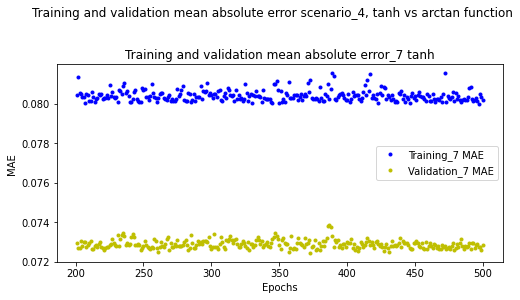

<Figure size 432x288 with 0 Axes>

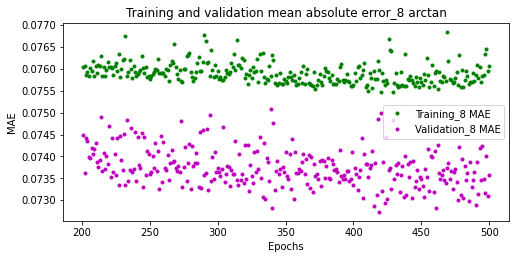

In [ ]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.

# scenario 1
train_1_mae = history_1.history['mae']
val_1_mae = history_1.history['val_mae']

train_2_mae = history_2.history['mae']
val_2_mae = history_2.history['val_mae']

# scenario 2
train_3_mae = history_3.history['mae']
val_3_mae = history_3.history['val_mae']

train_4_mae = history_4.history['mae']
val_4_mae = history_4.history['val_mae']

# scenario 3
train_5_mae = history_5.history['mae']
val_5_mae = history_5.history['val_mae']

train_6_mae = history_6.history['mae']
val_6_mae = history_6.history['val_mae']

# scenario 4
train_7_mae = history_7.history['mae']
val_7_mae = history_7.history['val_mae']

train_8_mae = history_8.history['mae']
val_8_mae = history_8.history['val_mae']

# scenario 1
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation mean absolute error scenario_1, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_1[SKIP:], train_1_mae[SKIP:], 'b.', label='Training_1 MAE')
plt.plot(epochs_1[SKIP:], val_1_mae[SKIP:], 'y.', label='Validation_1 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_1 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_2[SKIP:], train_2_mae[SKIP:], 'g.', label='Training_2 MAE')
plt.plot(epochs_2[SKIP:], val_2_mae[SKIP:], 'm.', label='Validation_2 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_2 arctan')
plt.legend()
plt.show()

# scenario 2
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation mean absolute error scenario_2, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_3[SKIP:], train_3_mae[SKIP:], 'b.', label='Training_3 MAE')
plt.plot(epochs_3[SKIP:], val_3_mae[SKIP:], 'y.', label='Validation_3 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_3 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_4[SKIP:], train_4_mae[SKIP:], 'g.', label='Training_4 MAE')
plt.plot(epochs_4[SKIP:], val_4_mae[SKIP:], 'm.', label='Validation_4 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_4 arctan')
plt.legend()
plt.show()

# scenario 3
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation mean absolute error scenario_3, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_5[SKIP:], train_5_mae[SKIP:], 'b.', label='Training_5 MAE')
plt.plot(epochs_5[SKIP:], val_5_mae[SKIP:], 'y.', label='Validation_5 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_5 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_6[SKIP:], train_6_mae[SKIP:], 'g.', label='Training_6 MAE')
plt.plot(epochs_6[SKIP:], val_6_mae[SKIP:], 'm.', label='Validation_6 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_6 arctan')
plt.legend()
plt.show()

# scenario 4
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Training and validation mean absolute error scenario_4, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(epochs_7[SKIP:], train_7_mae[SKIP:], 'b.', label='Training_7 MAE')
plt.plot(epochs_7[SKIP:], val_7_mae[SKIP:], 'y.', label='Validation_7 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_7 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(epochs_8[SKIP:], train_8_mae[SKIP:], 'g.', label='Training_8 MAE')
plt.plot(epochs_8[SKIP:], val_8_mae[SKIP:], 'm.', label='Validation_8 MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and validation mean absolute error_8 arctan')
plt.legend()
plt.show()

3. Actual vs Predicted Output

7/7 [==============================] - 0s 2ms/step - loss: 0.0096 - mae: 0.0806


<Figure size 432x288 with 0 Axes>

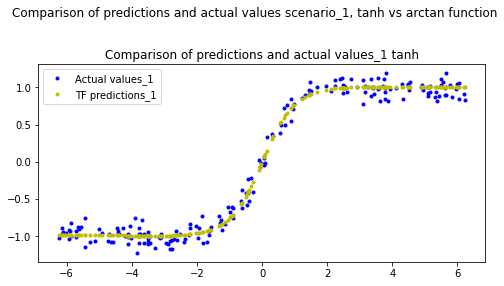

<Figure size 432x288 with 0 Axes>

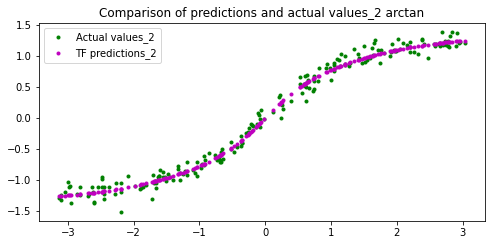

<Figure size 432x288 with 0 Axes>

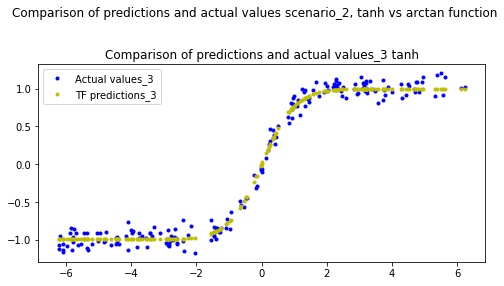

<Figure size 432x288 with 0 Axes>

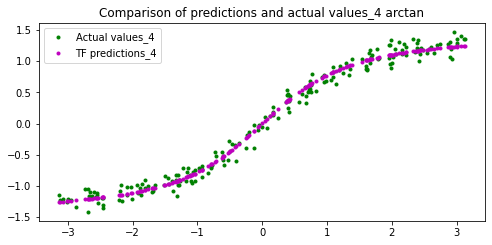

<Figure size 432x288 with 0 Axes>

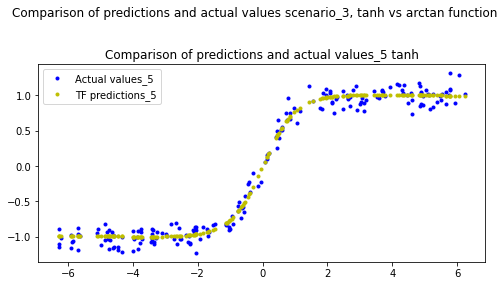

<Figure size 432x288 with 0 Axes>

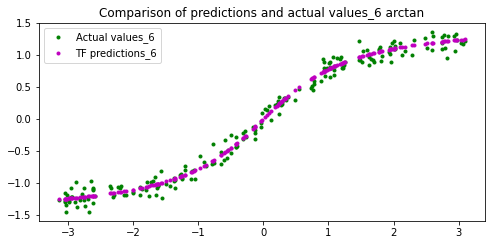

<Figure size 432x288 with 0 Axes>

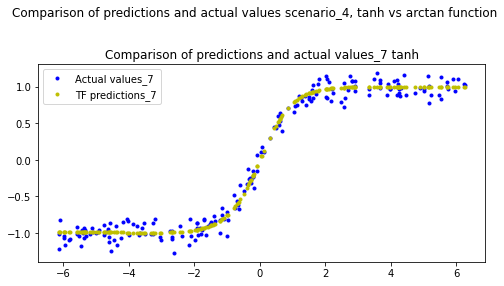

<Figure size 432x288 with 0 Axes>

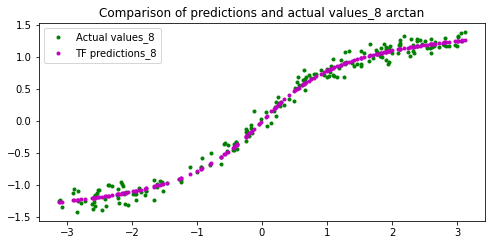

In [ ]:
# Calculate and print the loss on our test dataset

# scenario 1
test_1_loss, test_1_mae = model_1.evaluate(x_1_test, y_1_test)
test_2_loss, test_2_mae = model_2.evaluate(x_2_test, y_2_test)

# scenario 2
test_3_loss, test_3_mae = model_3.evaluate(x_3_test, y_3_test)
test_4_loss, test_4_mae = model_4.evaluate(x_4_test, y_4_test)

# scenario 3
test_5_loss, test_5_mae = model_5.evaluate(x_5_test, y_5_test)
test_6_loss, test_6_mae = model_6.evaluate(x_6_test, y_6_test)

# scenario 4
test_7_loss, test_7_mae = model_7.evaluate(x_7_test, y_7_test)
test_8_loss, test_8_mae = model_8.evaluate(x_8_test, y_8_test)

# Make predictions based on our test dataset

# scenario 1
y_1_test_pred = model_1.predict(x_1_test)
y_2_test_pred = model_2.predict(x_2_test)

# scenario 2
y_3_test_pred = model_3.predict(x_3_test)
y_4_test_pred = model_4.predict(x_4_test)

# scenario 3
y_5_test_pred = model_5.predict(x_5_test)
y_6_test_pred = model_6.predict(x_6_test)

# scenario 4
y_7_test_pred = model_7.predict(x_7_test)
y_8_test_pred = model_8.predict(x_8_test)

# Graph the predictions against the actual values

# scenario 1
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Comparison of predictions and actual values scenario_1, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_1_test, y_1_test, 'b.', label='Actual values_1')
plt.plot(x_1_test, y_1_test_pred, 'y.', label='TF predictions_1')
plt.title('Comparison of predictions and actual values_1 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_2_test, y_2_test, 'g.', label='Actual values_2')
plt.plot(x_2_test, y_2_test_pred, 'm.', label='TF predictions_2')
plt.title('Comparison of predictions and actual values_2 arctan')
plt.legend()
plt.show()

# scenario 2
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Comparison of predictions and actual values scenario_2, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_3_test, y_3_test, 'b.', label='Actual values_3')
plt.plot(x_3_test, y_3_test_pred, 'y.', label='TF predictions_3')
plt.title('Comparison of predictions and actual values_3 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_4_test, y_4_test, 'g.', label='Actual values_4')
plt.plot(x_4_test, y_4_test_pred, 'm.', label='TF predictions_4')
plt.title('Comparison of predictions and actual values_4 arctan')
plt.legend()
plt.show()

# scenario 3
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Comparison of predictions and actual values scenario_3, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_5_test, y_5_test, 'b.', label='Actual values_5')
plt.plot(x_5_test, y_5_test_pred, 'y.', label='TF predictions_5')
plt.title('Comparison of predictions and actual values_5 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_6_test, y_6_test, 'g.', label='Actual values_6')
plt.plot(x_6_test, y_6_test_pred, 'm.', label='TF predictions_6')
plt.title('Comparison of predictions and actual values_6 arctan')
plt.legend()
plt.show()

# scenario 4
plt.clf()
plt.figure(figsize=(8, 8))
plt.suptitle('Comparison of predictions and actual values scenario_4, tanh vs arctan function')
plt.subplot(2,1,1)
plt.plot(x_7_test, y_7_test, 'b.', label='Actual values_7')
plt.plot(x_7_test, y_7_test_pred, 'y.', label='TF predictions_7')
plt.title('Comparison of predictions and actual values_7 tanh')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(8, 8))
plt.subplot(2,1,2)
plt.plot(x_8_test, y_8_test, 'g.', label='Actual values_8')
plt.plot(x_8_test, y_8_test_pred, 'm.', label='TF predictions_8')
plt.title('Comparison of predictions and actual values_8 arctan')
plt.legend()
plt.show()

Kesimpulan: 

1. Arctan function with tanh activation performance > Tanh function with tanh activation performance
2. Larger model = More smoothness fit
3. Larger model = More capability to learn more complex model
4. Larger model = Higher performance to predict data
5. Larger model = Higher epoch to reach saturated value
6. Larger model = Higher complexity and Longer computational time